In [58]:
from music21 import *

def tab(notes):
    s = stream.Score()
    p = stream.Part()
    c = clef.TabClef()
    l = layout.StaffLayout()
    l.staffLines = 6

    # get info
    info_start = 5

    for i in range(info_start, len(notes)):
        if notes[i : i + 5] == "INFO ":
            info_end = i

    info = list(filter(lambda x: len(x) > 0, notes[info_start:info_end].split(" ")))
    
    t = meter.TimeSignature(info[2])
    
    p.append(t)
    p.append(c)
    p.append(l)
    
    g = instrument.AcousticGuitar()
    p.append(g)
    
    notes = notes[info_end + 5 :].split(" ")
    for n in notes:
        if n[0] == "!":
            p.append(harmony.ChordSymbol(n[1:]))
        else:
            is_chord, is_tie = False, "none"
            if "(" in n:
                is_chord = True
                note_name = n.replace("(", "").replace(")", "").split(",")
                if "t" in note_name[-1]:
                    note_length = note_name[-1][-2:]
                    note_name[-1] = note_name[-1][:-2]
                else:
                    note_length = note_name[-1][-1]
                    note_name[-1] = note_name[-1][:-1]
            else:
                if "{" in n:
                    is_tie = "start"
                if "}" in n:
                    is_tie = "stop"
                if n[-1] == "t":
                    note_name = n[:-2].replace("{", "").replace("}", "")
                    note_length = n[-2:]
                else:
                    note_name = n[:-1].replace("{", "").replace("}", "")
                    note_length = n[-1:]
            lengths = [["w", 4], ["h", 2], ["d", 3], ["q", 1], ["u", 1.5], ["e", 0.5], ["s", 0.25]]
            for l in lengths:
                if isinstance(note_length, str):
                    if l[0] in note_length:
                        if "t" in note_length:
                            note_length = l[1] * 0.333333333
                        else:
                            note_length = l[1]
            if isinstance(note_name, list):
                add_n = chord.Chord(note_name, quarterLength=note_length)
            else:
                if note_name.lower() == "r":
                    add_n = note.Rest(quarterLength=note_length)
                else:
                    add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            
            p.append(add_n)
    
    s.append(p)
    s.makeNotation()
    
    s.show()

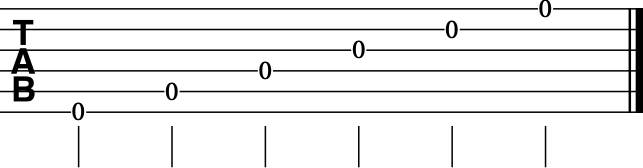

In [59]:
notes = "INFO guitar c 6/4 INFO e2q a2q d3q g3q b3q e4q"

tab(notes)

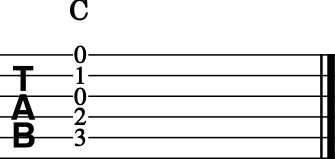

In [60]:
notes = "INFO guitar c 4/4 INFO !c (c3,e3,g3,c4,e4)w"

tab(notes)